<a href="https://colab.research.google.com/github/ephemerno/Projects-Data/blob/master/Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS, KMeans
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

In [2]:
data = pd.read_csv("/content/DATA_1112_eng.csv", sep=";", encoding='latin-1')
# EEG_vecsler = pd.read_csv("/content/EEG_vecsler.csv", sep=";", encoding='latin-1')
# MRT_EEG_2 = pd.read_csv("/content/MRT_EEG.csv", sep=";", encoding='latin-1')
# MRT_vecsler = pd.read_csv("/content/MRT_vecsler.csv", sep=";", encoding='latin-1')
mask = (data['EEG'] == 1) & (data['MRI'] == 1)
dt = data[mask]
dt.shape
label_desease = dt['Code3']
MRT_EEG = data[(data['EEG'] == 1) & (data['MRI'] == 1)]
MRT_EEG = MRT_EEG.drop(columns=data.columns[:114])
MRT_EEG = MRT_EEG.drop(columns=['MRI', "EEG"])
EEG = MRT_EEG[data.columns[-64:]]
MRT = MRT_EEG[MRT_EEG.columns[:-64]]
Vecsler = data[data.columns[103:115]]


In [3]:
M_E = pd.read_csv("/content/MRT_EEG.csv", sep=";", encoding='latin-1')
E_V = pd.read_csv("/content/EEG_Vecsler.csv", sep=";", encoding='latin-1')
M_V = pd.read_csv("/content/MRT_Vecsler.csv", sep=";", encoding='latin-1')

In [ ]:
EEG

,Fp1-Av Delta,Fp2-Av Delta,F3-Av Delta,F4-Av Delta,C3-Av Delta,C4-Av Delta,P3-Av Delta,P4-Av Delta,O1-Av Delta,O2-Av Delta,...,P3-Av Beta1,P4-Av Beta1,O1-Av Beta1,O2-Av Beta1,F7-Av Beta1,F8-Av Beta1,T3-Av Beta1,T4-Av Beta1,T5-Av Beta1,T6-Av Beta1
21,0.217,0.278,0.231,0.282,0.262,0.241,0.307,0.178,0.313,0.229,...,0.348,0.241,0.351,0.254,0.195,0.293,0.281,0.299,0.346,0.274
29,0.378,0.404,0.284,0.401,0.202,0.218,0.294,0.349,0.312,0.363,...,0.267,0.349,0.213,0.351,0.219,0.353,0.307,0.334,0.293,0.345
30,0.277,0.323,0.324,0.322,0.348,0.318,0.317,0.315,0.258,0.301,...,0.355,0.322,0.323,0.341,0.341,0.329,0.380,0.363,0.345,0.298
31,0.239,0.235,0.238,0.200,0.121,0.172,0.195,0.273,0.226,0.283,...,0.311,0.333,0.305,0.328,0.232,0.239,0.313,0.306,0.317,0.312
33,0.295,0.236,0.325,0.219,0.347,0.315,0.381,0.283,0.333,0.251,...,0.302,0.239,0.274,0.226,0.196,0.232,0.298,0.254,0.299,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.680,0.600,0.670,0.640,0.570,0.660,0.630,0.700,0.660,0.710,...,0.650,0.710,0.650,0.700,0.640,0.620,0.620,0.650,0.640,0.700
202,0.650,0.620,0.610,0.590,0.530,0.590,0.600,0.610,0.610,0.600,...,0.630,0.610,0.610,0.640,0.610,0.580,0.590,0.630,0.620,0.630
203,0.620,0.660,0.600,0.660,0.580,0.620,0.560,0.630,0.600,0.630,...,0.650,0.680,0.680,0.680,0.650,0.640,0.610,0.660,0.650,0.660
205,0.560,0.540,0.540,0.510,0.420,0.500,0.530,0.500,0.560,0.540,...,0.550,0.560,0.500,0.510,0.510,0.490,0.510,0.490,0.510,0.520


In [ ]:
len(MRT_EEG.columns[:-64])

316

In [ ]:
data.shape

(210, 496)

In [4]:
lab = np.array(label_desease)
print(lab)

[1 1 3 3 3 1 3 3 3 3 3 1 3 1 1 2 3 1 3 1 3 3 1 1 3 2 1 1 1 3 3 2 3 2 3 2 2
 2 3 3 3 3 2 2 1 2 1 2 1 2 2 1 3 1 4 4 4 4 4 1 1 3 1 1 1 1 3 1 3 2 2 2 2 3
 4 4 4 4 4 4 1 1 4 2 4 4 4 4 4 4 3 1 2 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 1 1
 1 2 2 2 1 2]


In [ ]:
data.head()

,id,Code3,Sex,Age,Education,Occupation,Martial Status,Accommodation,Living Condition,Disability,...,P3-Av Beta1,P4-Av Beta1,O1-Av Beta1,O2-Av Beta1,F7-Av Beta1,F8-Av Beta1,T3-Av Beta1,T4-Av Beta1,T5-Av Beta1,T6-Av Beta1
0,1,1,2,83,6.0,6.0,4.0,3.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,69,4.0,6.0,4.0,1.0,1.0,1.0,...,0.286,0.273,0.278,0.237,0.297,0.261,0.320,0.314,0.294,0.276
2,3,3,2,64,6.0,6.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,2,56,4.0,1.0,5.0,2.0,1.0,1.0,...,0.305,0.290,0.307,0.314,0.257,0.297,0.300,0.306,0.316,0.327
4,5,2,1,74,4.0,6.0,2.0,3.0,1.0,1.0,...,0.336,0.323,0.283,0.297,0.276,0.306,0.328,0.306,0.335,0.319


In [5]:
MRT_other = MRT.dropna()
EEG_other = EEG.dropna()
EEG_other.columns
Vecsler_other = Vecsler.dropna()
M_E_other = M_E.dropna()
E_V_other = E_V.dropna()
M_V_other = M_V.dropna()

In [ ]:
E_V_other

,id,Code3,EEG,Fp1-Av Delta,Fp2-Av Delta,F3-Av Delta,F4-Av Delta,C3-Av Delta,C4-Av Delta,P3-Av Delta,...,In III,In IV,In V,In Va pr,In Vb obr,In VI,In VII,In VIIa light,In VIIb hard,In EIPP
1,2,1,1.0,0.165,0.238,0.161,0.296,0.354,0.378,0.346,...,4.0,7.0,10.0,6.0,4.0,2.0,10.0,7.0,3.0,94.0
3,4,1,1.0,0.246,0.319,0.212,0.222,0.223,0.243,0.319,...,5.0,11.0,12.0,6.0,6.0,6.0,18.0,9.0,9.0,120.0
4,5,2,1.0,0.318,0.374,0.264,0.307,0.264,0.298,0.318,...,4.0,4.0,9.0,6.0,3.0,1.0,5.0,5.0,0.0,81.0
10,12,1,1.0,0.252,0.281,0.260,0.261,0.335,0.340,0.338,...,3.0,3.0,11.0,6.0,5.0,4.0,6.0,6.0,0.0,89.0
12,14,1,1.0,0.276,0.274,0.229,0.272,0.272,0.315,0.289,...,4.0,7.0,8.0,5.0,3.0,4.0,7.0,7.0,0.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,221,2,1.0,0.680,0.600,0.670,0.640,0.570,0.660,0.630,...,9.0,4.0,12.0,7.0,5.0,5.0,8.0,7.0,1.0,100.0
202,222,2,1.0,0.650,0.620,0.610,0.590,0.530,0.590,0.600,...,2.0,10.0,9.0,5.0,4.0,8.0,17.0,9.0,8.0,120.0
203,223,2,1.0,0.620,0.660,0.600,0.660,0.580,0.620,0.560,...,7.0,9.0,12.0,7.0,5.0,4.0,14.0,7.0,7.0,120.0
205,225,1,1.0,0.560,0.540,0.540,0.510,0.420,0.500,0.530,...,4.0,1.0,10.0,5.0,5.0,4.0,5.0,5.0,0.0,84.0


In [6]:
EEG_dr_new = preprocessing.normalize(EEG_other)
MRT_dr_new = preprocessing.normalize(MRT_other)
Vecsler_dr_new = preprocessing.normalize(Vecsler_other)
M_E_new = preprocessing.normalize(M_E_other)
E_V_new = preprocessing.normalize(E_V_other)
M_V_new = preprocessing.normalize(M_V_other)
#M_E_dr = pd.DataFrame(M_E_new, columns =[:383])
E_V_dr = pd.DataFrame(E_V_new, columns = E_V_other.columns)
M_E_dr = pd.DataFrame(M_E_new, columns = M_E_other.columns) 
M_V_dr = pd.DataFrame(M_V_new, columns = M_V_other.columns)
#M_V_dr = pd. DataFrame(M_V_new,columns =[:331])
EEG_dr = pd.DataFrame(EEG_dr_new, columns = EEG_other.columns)
MRT_dr = pd.DataFrame(MRT_dr_new, columns = MRT_other.columns) #MRT_EEG.columns[:-64]
Vecsler_dr = pd.DataFrame(Vecsler_dr_new, columns =['In I', 'In II', 'In III', 'In IV', 'In V', 'In Va pr', 'In Vb obr', 'In VI', 'In VII', 'In VIIa light', 'In VIIb hard', 'In EIPP'])

In [ ]:
Vecsler_dr.shape

(198, 12)

In [ ]:
EEG_dr.shape

(117, 64)

In [ ]:
MRT_dr.shape

(115, 316)

In [ ]:
E_V_dr.shape

(151, 80)

In [7]:
def my_metric(x, y):
  c = 1 / np.correlate(x, y)
  return c

In [8]:
1 / my_metric(E_V_dr.iloc[0].values, E_V_dr.iloc[1].values)[0]

0.9973877239183041

In [9]:
min = 1000
max = -1
for i in range(len(MRT_dr)):
  for j in range(len(MRT_dr)):
    now = 1 / my_metric(E_V_dr.iloc[i].values, E_V_dr.iloc[j].values)[0]
    if now > max:
      max = now
    if now < min:
      min = now
print(min, max)

0.9716823094495156 1.0000000000000002


In [ ]:
EEG_dr.shape

(117, 64)

In [ ]:
MRT_dr

,In EIPP,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,...,Left rostralanteriorcingulate ThickAvg,Left rostralmiddlefrontal ThickAvg,Left superiorfrontal ThickAvg,Left superiorparietal ThickAvg,Left superiortemporal ThickAvg,Left supramarginal ThickAvg,Left frontalpole ThickAvg,Left temporalpole ThickAvg,Left transversetemporal ThickAvg,Left insula ThickAvg
0,0.000844,0.022377,0.017670,0.057656,0.018122,0.007223,0.046007,0.082319,0.039356,0.028074,...,0.000018,0.000017,0.000020,0.000016,0.000018,0.000019,0.000018,0.000029,0.000017,0.000022
1,0.000744,0.023966,0.023908,0.048914,0.014846,0.004325,0.046770,0.068382,0.044813,0.027512,...,0.129471,0.000015,0.000016,0.323533,0.000018,0.000016,0.000015,0.000024,0.000012,0.000021
2,0.000697,0.019771,0.015324,0.031783,0.012106,0.003455,0.034759,0.064829,0.037901,0.028092,...,0.000018,0.077839,0.000016,0.000013,0.000016,0.000016,0.000016,0.000020,0.000013,0.000017
3,0.000702,0.022415,0.014858,0.040410,0.010735,0.004246,0.034553,0.065902,0.037579,0.027008,...,0.000016,0.082121,0.000015,0.000012,0.000016,0.000014,0.000020,0.000023,0.000012,0.000018
4,0.000816,0.014484,0.020420,0.055904,0.010911,0.005981,0.055503,0.072321,0.042299,0.034338,...,0.000024,0.000018,0.000021,0.000016,0.000018,0.000017,0.000018,0.000029,0.000014,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.000534,0.016894,0.014214,0.040036,0.018511,0.005271,0.038835,0.057449,0.038207,0.026180,...,0.000013,0.000012,0.000013,0.000010,0.000012,0.000012,0.000016,0.000020,0.239372,0.140669
111,0.000800,0.016651,0.017013,0.040195,0.015303,0.006179,0.039000,0.064067,0.044562,0.023514,...,0.000019,0.000016,0.000018,0.000014,0.000018,0.000015,0.000019,0.000029,0.000016,0.000019
112,0.000754,0.018514,0.014601,0.049381,0.019409,0.005839,0.041091,0.064810,0.041422,0.023811,...,0.000016,0.000014,0.119550,0.000013,0.000015,0.000015,0.000015,0.000019,0.000016,0.000017
113,0.000434,0.017180,0.016028,0.035830,0.013816,0.003667,0.036169,0.052811,0.035457,0.019158,...,0.000014,0.000013,0.000014,0.000012,0.000014,0.000013,0.000015,0.000017,0.000012,0.000016


In [ ]:
#writer = pd.ExcelWriter('output.xlsx')
#EEG_dr.to_excel(writer, 'marks')
#writer.save()

In [10]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 6.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342166 sha256=3e0774584f6595f675bfb71ceffa374bba750acc15339c9faea7fca57f312097
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [51]:
#db = DBSCAN(algorithm = 'auto', eps = 1.0004, min_samples = 9, metric=my_metric).fit(Vecsler_dr)
#db = OPTICS(min_samples=6, eps = 0.005, metric=my_metric).fit(EEG_dr)
#db = KMeans(n_clusters=4, random_state=0).fit(EEG_dr)
db = Birch(n_clusters = 4, threshold = 0.0205).fit(Vecsler_dr)
#x = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=4)
#db = GaussianMixture(n_components=2).fit(EEG_dr)

#pca = PCA(n_components=2)
#components = pca.fit_transform(EEG_dr)

components = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Vecsler_dr)
total_var = 5

#total_var = pca.explained_variance_ratio_.sum() * 100
#labels = np.array(db.labels_) branching_factor = 2


In [43]:
import hdbscan
db = hdbscan.HDBSCAN(min_cluster_size=2).fit(Vecsler_dr)

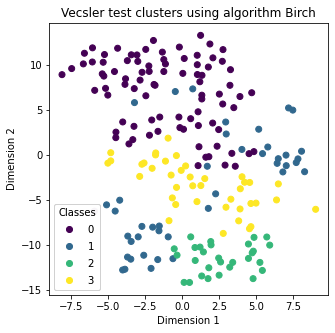

In [52]:
labels = np.array(db.labels_)
fig, ax = plt.subplots(figsize=(5, 5))
scatter = ax.scatter(components[:,0],components[:,1],c=db.labels_)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.title('Vecsler test clusters using algorithm Birch')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
print(*scatter.legend_elements())

[<matplotlib.lines.Line2D object at 0x7f9cc1c76590>, <matplotlib.lines.Line2D object at 0x7f9cc1cdd590>, <matplotlib.lines.Line2D object at 0x7f9cc1ca2850>, <matplotlib.lines.Line2D object at 0x7f9cc1cdd3d0>] ['$\\mathdefault{−1}$', '$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$']


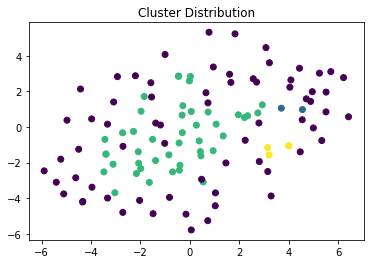

In [ ]:
labels = np.array(db.labels_)
plt.scatter(components[:,0],components[:,1],c=db.labels_)
plt.title('Cluster Distribution')
plt.show()

In [ ]:
labels.shape

In [ ]:
print(M_V_dr.shape)
list_index = [0,0,0,0]
for i in range(components.shape[0]):
  print(components[i,:])
  #print(Vecsler_dr.iloc[i])
  #index_new = data.iloc[i]['Code3'] 
  index_new = labels[i]
  #print('Index is', index_new)
  list_index[int(index_new) - 1] += 1
print(list_index)  
print(labels) 
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

a1 = np.zeros((list_index[3],1))
a2 = np.zeros((list_index[0],1))
a3 = np.zeros((list_index[1],1))
a4 = np.zeros((list_index[2],1))
k = [0, 0, 0, 0]
for i in range(labels.shape[0]):
  if labels[i] == 0:
    a1[k[0]] = i
    k[0]+=1
  if labels[i] == 1:
    a2[k[1]] = i  
    k[1]+=1
  if labels[i] == 2:
    a3[k[2]] = i  
    k[2]+=1  
  if labels[i] == 3:
    a4[k[3]] = i   
    k[3]+=1   


In [ ]:
k[3]

In [ ]:

# print(a1)
# print(a2)
# print(a3)
# print(a4)

a1 = a1.astype(int)
pd1 = M_V_dr.iloc[a1[:,0]]

a2 = a2.astype(int)
pd2 = M_V_dr.iloc[a2[:,0]]

a3 = a3.astype(int)
pd3 = M_V_dr.iloc[a3[:,0]]

a4 = a4.astype(int)
pd4 = M_V_dr.iloc[a4[:,0]]

pd1.to_excel('Cluster1_M_V.xlsx')
pd2.to_excel('Cluster2_M_V.xlsx')
pd3.to_excel('Cluster3_M_V.xlsx')
pd4.to_excel('Cluster4_M_V.xlsx')


In [ ]:
np.max(a1)

In [ ]:
for i in range(components.shape[0]):
  curr = [i,int(labels[i])]
  if labels[i] == 0:
    cluster1.append(curr)
  elif labels[i] == 1:
    cluster2.append(curr)
  elif labels[i] == 2:
    cluster3.append(curr)
  elif labels[i] == 3:
    cluster4.append(curr)    

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)

In [ ]:
print(cluster1, cluster2, cluster3)
unique, counts = np.unique(cluster1[:,1], return_counts=True)
elements_of_sickness1 = dict(zip(unique, counts))
print(elements_of_sickness1)

unique, counts = np.unique(cluster2[:,1], return_counts=True)
elements_of_sickness2 = dict(zip(unique, counts))
print(elements_of_sickness2)

unique, counts = np.unique(cluster3[:,1], return_counts=True)
elements_of_sickness3 = dict(zip(unique, counts))
print(elements_of_sickness3)

unique, counts = np.unique(cluster4[:,1], return_counts=True)
elements_of_sickness4 = dict(zip(unique, counts))
print(elements_of_sickness4)

In [ ]:
'''
Поскольку использовать изначальные данные по болезням смысла нет(если мы предполагаем), что всё плохо, то используем только внутренние меры оценки


https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8


'''
#внутригрупповая дисперсия - компактность - минимизируем
#межгрупповая дисперсия - разделимость - максимизируем

#силуэт
#score function / SF(там exp)

In [ ]:
def get_compact(X, labels):
  '''
  Считает компактность
  '''
  X = X.values
  score = 0
  for i in np.unique(labels):
    X_samp = X[np.where(labels == i, True, False)]
    X_samp_mean = X_samp.mean()
    for j in X_samp:
      score += sum((j - X_samp_mean) ** 2)
  return score


def get_separab(X, labels):
  '''
  Считает разделимость/отделимость
  '''
  X = X.values
  X_mean = X.mean()
  score = 0
  for i in np.unique(labels):
    X_samp = X[np.where(labels == i, True, False)]
    for j in X_samp:
      score += X_samp.shape[1] * sum((j - X_mean) ** 2)
  return score

In [ ]:
from sklearn import metrics

print(f"Компактность: {get_compact(MRT_dr, labels)}")
print(f"Разделимость: {get_separab(MRT_dr, labels)}")
print(f"Cилуэт: {metrics.silhouette_score(MRT_dr, labels, metric='euclidean')}")

In [ ]:
data['Code3'].shape

In [ ]:
# from sklearn import metrics

# label_desease = label_desease - 1
# print(f"Компактность: {get_compact(MRT_dr, label_desease)}")
# print(f"Разделимость: {get_separab(MRT_dr, label_desease)}")
# print(f"Cилуэт: {metrics.silhouette_score(MRT_dr, label_desease, metric='euclidean')}")

In [ ]:
first_cluster = pd.read_excel('/content/Cluster1_MRI.xlsx')
first_cluster.describe()

second_cluster = pd.read_excel('/content/Cluster2_MRI.xlsx')
second_cluster.describe()

third_cluster = pd.read_excel('/content/Cluster3_MRI.xlsx')
third_cluster.describe()

fourth_cluster = pd.read_excel('/content/Cluster4_MRI.xlsx')
fourth_cluster.describe()


In [ ]:
first_cluster = first_cluster.drop(columns=['Unnamed: 0'])
second_cluster = second_cluster.drop(columns=['Unnamed: 0'])
third_cluster = third_cluster.drop(columns=['Unnamed: 0'])
fourth_cluster = fourth_cluster.drop(columns=['Unnamed: 0'])

In [ ]:
#центры кластеров
'''
центры кластеров - это, по сути, среднее по каждому измерению
как центр круга - это усреднение координат всех точек на окружности
'''
first_center = first_cluster.mean()
second_cluster = second_cluster.mean()
third_cluster = third_cluster.mean()
fourth_cluster = fourth_cluster.mean()

In [ ]:
centers = [first_center, second_cluster, third_cluster, fourth_cluster]

for i in range(len(centers)):
  for j in range(i):
    if i == j:
      continue
    else:
      print(f"Расстояние между центрами {j + 1}-ого и {i + 1}-ого кластеров: {np.linalg.norm(centers[i]-centers[j])}")

In [ ]:
# расчёт std - корень из дисперсии
'''
считаеться отдельно по каждому измерению
если надо среднюю дисперсию, то
first_std = np.std(first_cluster)
mean_first_std = first_std.sum() / len(first_std)
'''
first_std = np.std(first_cluster)
second_std = np.std(second_cluster)
third_std = np.std(third_cluster)
fourth_std = np.std(fourth_cluster)

In [ ]:
std = [first_std, second_cluster, third_cluster, fourth_cluster]

for i in range(len(std)):
  for j in range(i):
    if i == j:
      continue
    else:
      print(f"СКО {j + 1}-ого и {i + 1}-ого кластеров: {np.linalg.norm(std[i]-std[j])}")